In [278]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Traceback (most recent call last):
  File "C:\Users\17520\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "C:\Users\17520\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\17520\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [279]:
#import file excel vào df (dataframe)
df=pd.read_excel('HusbandWife.xlsx')
df.head()

,Wife's Age,Husband's Age
0,43,49
1,28,25
2,30,40
3,57,52
4,52,58


In [280]:
#Đổi tên cột cho dễ sử dụng
df.rename(columns={"Wife's Age":"Wife","Husband's Age":"Husband"},inplace=True)
df.head()

,Wife,Husband
0,43,49
1,28,25
2,30,40
3,57,52
4,52,58


In [281]:
X=np.array(df['Husband'])
Y=np.array(df['Wife'])

<IPython.core.display.Javascript object>


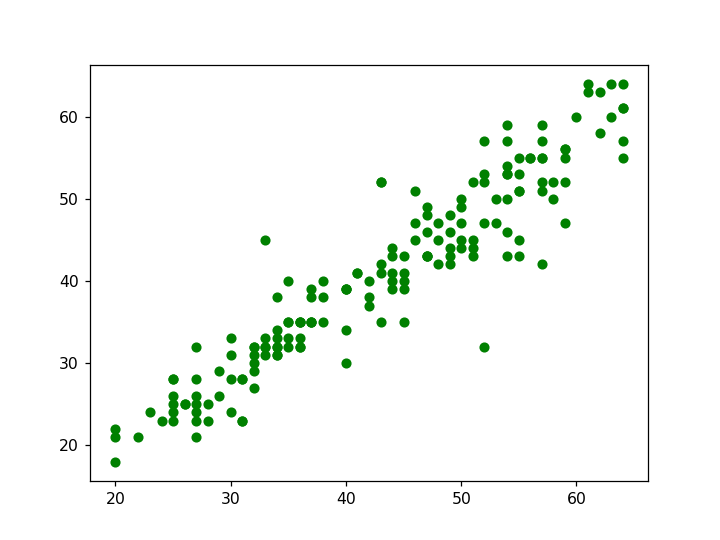

In [282]:
plt.scatter(X,Y,c='green',s=30)

In [283]:
def Prediction(X,theta1,theta0):
    return X*theta1+theta0

In [284]:
np.random.seed(123)
def InitTheta():
    Theta1=np.random.random()
    Theta0=np.random.random()
    return Theta1,Theta0
theta1,theta0=InitTheta()

In [285]:
def CostFunc():
    m=len(X)
    return (1.0/2*m)*np.sum(((Prediction(X,theta1,theta0)-Y)**2))

In [286]:
#Chọn alpha
CostFunc()

1909253.7315790413

In [287]:
def GradientDescent(theta0,theta1,alpha=0.001):
    m=len(X)
    prediction=Prediction(X,theta1,theta0)
    Theta0=theta0-alpha/m*np.sum(prediction-Y)
    Theta1=theta1-alpha/m*np.sum((prediction-Y)*X)
    return Theta0,Theta1

In [288]:
iterations = 375
Theta=np.array([theta0,theta1])
CFunc=np.array([CostFunc()])
for i in range(iterations):
    theta0,theta1=GradientDescent(theta0,theta1)
    Theta=np.vstack((Theta,np.array([theta0,theta1])))
    CFunc=np.append(CFunc,np.array([CostFunc()]))
    
import matplotlib.animation as animation
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == iterations: 
        a.event_source.stop()
    plt.cla()
    plt.scatter(X,Y,color='green')
    plt.axis([15,75,15,75])
    Xvals=np.array([20,70])
    Yvals=np.array(Prediction(Xvals,Theta[curr][1],Theta[curr][0]))
    plt.plot(Xvals,Yvals,color='red')
    plt.gca().set_title('Linear Regression')
    plt.gca().set_ylabel("Husband's Age")
    plt.gca().set_xlabel("Wife's Age")
    plt.annotate('Cost Function = {}'.format(CFunc[curr]), [20,70])

<IPython.core.display.Javascript object>


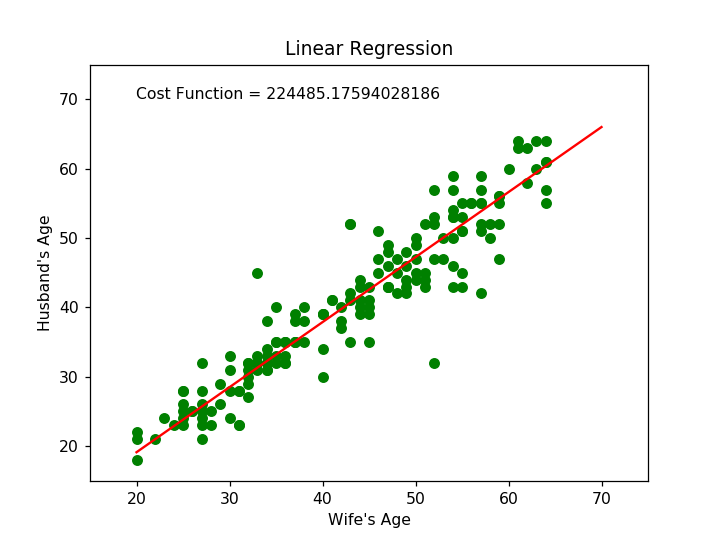

In [289]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=50)